<a href="https://colab.research.google.com/github/arangurr/crypto-price-prediction/blob/master/Crypto_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import Model
from keras.layers import LSTM, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time

Using TensorFlow backend.


In [2]:
coin_name='ethereum'
mkt_data = pd.read_html(f'https://coinmarketcap.com/currencies/{coin_name}/historical-data/?start=20130428&end={time.strftime("%Y%m%d")}')[0]
mkt_data.columns = [i.replace('*','') for i in mkt_data.columns]
mkt_data = mkt_data.assign(Date=pd.to_datetime(mkt_data.Date))
mkt_data['Volume'] = (pd.to_numeric(mkt_data['Volume'], errors='coerce').fillna(0))
mkt_data.sort_values('Date', inplace=True)
mkt_data.set_index('Date')
mkt_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1482,2015-08-07,2.830000,3.540000,2.520000,2.770000,164329,166610555
1481,2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,45486894
1480,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,42399573
1479,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,42818364
1478,2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,64569288


In [0]:
split = .8
train_data = mkt_data[:int(len(mkt_data)*split)]
test_data = mkt_data[int(len(mkt_data)*split):]

In [0]:
input_scaler = MinMaxScaler()
def process_for_inputs(data, lookback=1):
  datat = input_scaler.transform(data[['Open', 'Close']])
  ins = []
  for i in range(len(datat)- lookback):
    ins.append(datat[i:(i+lookback)])
  return np.array(ins)

In [0]:
out_scaler = MinMaxScaler()
def process_for_outputs(data, lookback=1):
  outs = out_scaler.transform(data[['Close']].values[lookback:])
  return np.array(outs)

In [0]:
input_scaler.fit(train_data[['Open', 'Close']])
out_scaler.fit(train_data[['Close']])

x_train = process_for_inputs(train_data, 30)
y_train = process_for_outputs(train_data, 30)

x_test = process_for_inputs(test_data, 30)
y_test = process_for_outputs(test_data, 30)

In [7]:
ins = Input(shape=(x_train[0].shape))
x = LSTM(1024, return_sequences=True, activation='tanh')(ins)
x = Dropout(0.25)(x)
x = LSTM(512, return_sequences=False, activation='tanh')(x)
x = Dropout(0.25)(x)
out = Dense(1, activation='relu')(x)

model = Model(inputs=ins, outputs=out)
model.summary()
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

W0829 20:22:10.353663 140252079568768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 20:22:10.389301 140252079568768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 20:22:10.398714 140252079568768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 20:22:13.522864 140252079568768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0829 20:22:13.531397 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30, 2)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 1024)          4206592   
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 1024)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               3147776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 7,354,881
Trainable params: 7,354,881
Non-trainable params: 0
_________________________________________________

In [8]:
hist = model.fit(x_train,y_train,epochs=100,validation_split=0.15, batch_size=128, shuffle=False)


W0829 20:22:17.494971 140252079568768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 20:22:18.405838 140252079568768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 982 samples, validate on 174 samples
Epoch 1/100
982/982 [==============================] - 7s 7ms/step - loss: 0.0627 - mean_absolute_error: 0.1414 - val_loss: 0.0485 - val_mean_absolute_error: 0.2035
Epoch 2/100
982/982 [==============================] - 1s 978us/step - loss: 0.0191 - mean_absolute_error: 0.0771 - val_loss: 5.6806e-04 - val_mean_absolute_error: 0.0191
Epoch 3/100
982/982 [==============================] - 1s 992us/step - loss: 0.0148 - mean_absolute_error: 0.0741 - val_loss: 0.0222 - val_mean_absolute_error: 0.1451
Epoch 4/100
982/982 [==============================] - 1s 981us/step - loss: 0.0027 - mean_absolute_error: 0.0310 - val_loss: 5.8079e-04 - val_mean_absolute_error: 0.0211
Epoch 5/100
982/982 [==============================] - 1s 973us/step - loss: 0.0132 - mean_absolute_error: 0.0659 - val_loss: 5.6573e-04 - val_mean_absolute_error: 0.0191
Epoch 6/100
982/982 [==============================] - 1s 988us/step - loss: 0.0155 - mean_absolute_error: 0.

Best val error: 0.010847829721182927


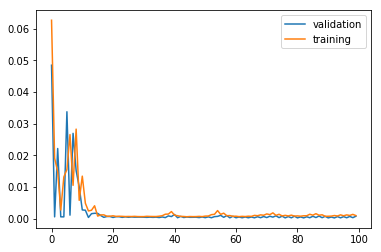

In [9]:
plt.plot(hist.history['val_loss'], label='validation')
plt.plot(hist.history['loss'], label='training')
plt.legend()
print(f"Best val error: {np.min(hist.history['val_mean_absolute_error'])}")

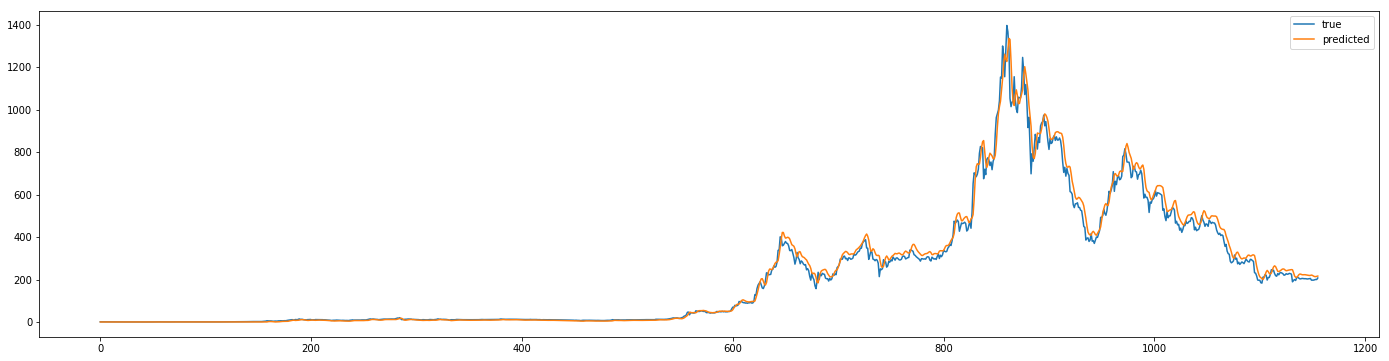

In [10]:
y_predict_on_train = model.predict(x_train)
y_predict_on_train = out_scaler.inverse_transform(y_predict_on_train)

y_true = out_scaler.inverse_transform(y_train)

plt.figure(figsize=(24,6))
plt.plot(y_true, label='true')
plt.plot(y_predict_on_train, label='predicted')
plt.legend()
plt.show()

In [11]:
test_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
296,2018-11-05,207.10,210.82,206.57,209.09,1613510000,21540996877
295,2018-11-06,209.47,218.45,207.89,218.45,1856940000,22445690692
294,2018-11-07,218.90,221.65,216.80,217.18,1927830000,22383497662
293,2018-11-08,217.33,218.34,212.20,212.23,1769080000,21877424057
292,2018-11-09,211.99,213.32,209.51,210.07,1554750000,21659329261


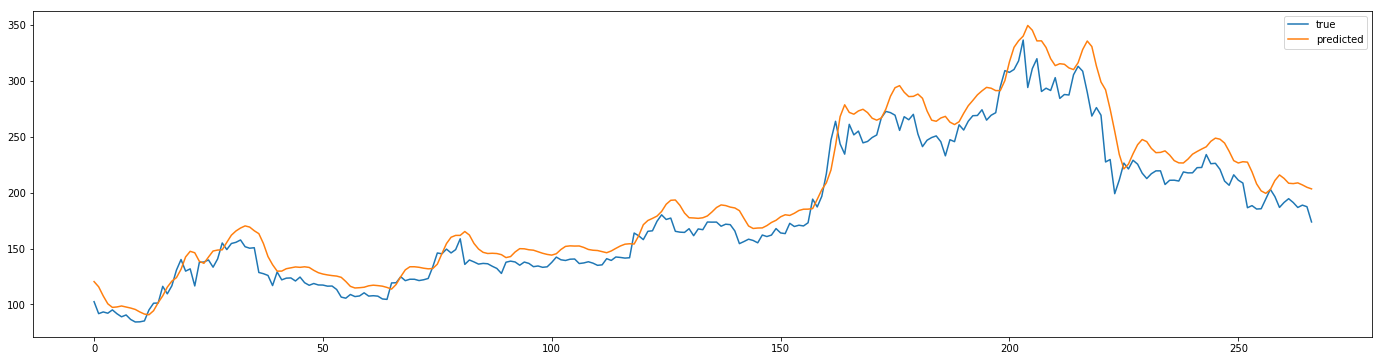

In [12]:
y_predict_on_test = model.predict(x_test)
y_predict_on_test = out_scaler.inverse_transform(y_predict_on_test)

y_true = out_scaler.inverse_transform(y_test)

plt.figure(figsize=(24,6))
plt.plot(y_true, label='true')
plt.plot(y_predict_on_test, label='predicted')
plt.legend()
plt.show()